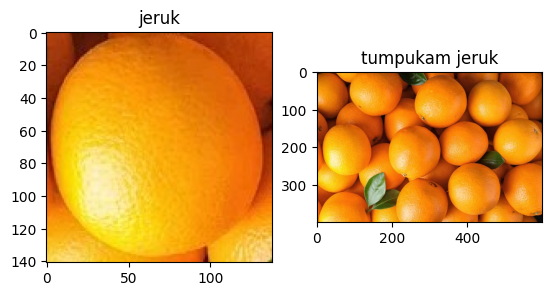

In [7]:
# tampilkan kedua gambar
from matplotlib import pyplot as plt
import cv2
from matplotlib import pyplot as plt

# panggil dan konversi warna agar sesuai dengan Matplotlib
sawit = cv2.imread('jeruk.jpg')
sawit = cv2.cvtColor(sawit, cv2.COLOR_BGR2RGB)

# panggil dan konversi warna agar sesuai dengan Matplotlib
kebun_sawit = cv2.imread('jerukmakanjeruk.jpg')
kebun_sawit = cv2.cvtColor(kebun_sawit, cv2.COLOR_BGR2RGB)
 
plt.subplot(121),plt.imshow(sawit), plt.title('jeruk')
plt.subplot(122),plt.imshow(kebun_sawit), plt.title('tumpukam jeruk')
plt.show()


Jumlah objek ditemukan: 16


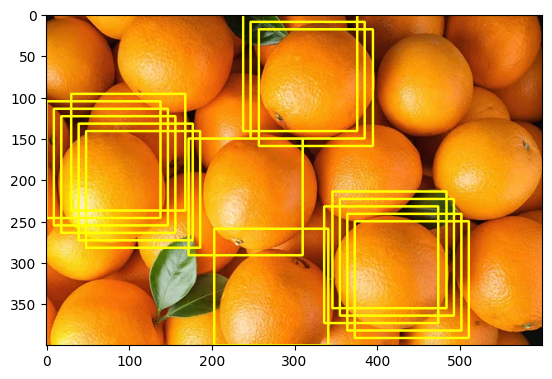

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar utuh untuk dicari
img_rgb = cv2.imread('jerukmakanjeruk.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Membaca template
template = cv2.imread('jeruk.jpg', 0)

# Ukuran template. Ukuran ini akan digunakan untuk menggambar kotak
w, h = template.shape[::-1]

# Menggunakan metode COEFF-NORMALIZED
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

# Mendapatkan posisi lokasi terbaik (koordinat x dan y) dari hasil pencocokan
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# Mendefinisikan batasan ambang batas deteksi kemiripan titik
threshold = 0.5

# Mencari posisi lokasi yang melebihi ambang batas
loc = np.where(res >= threshold)

#Membuat array kosong untuk menyimpan lokasi-lokasi dari hasil deteksi
lspoint = []
lspoint2 = []
count = 0  # Untuk menyimpan jumlah matching yang ditemukan

for pt in zip(*loc[::-1]):
    # Jika sudah ada, skip lokasi tersebut
    if pt[0] not in lspoint and pt[1] not in lspoint2:
        # Gambar persegi warna kuning dengan ketebalan dua poin
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)
        for i in range(pt[0] - 9, pt[0] + 9, 1):
            # Tambahkan koordinat x ke list
            lspoint.append(i)
        for k in range(pt[1] - 9, pt[1] + 9, 1):
            # Tambahkan koordinat y ke list
            lspoint2.append(k)
        count += 1  # Berapa jumlah matching yang ditemukan?
    else:
        continue

print("Jumlah objek ditemukan:", count)

# Tampilkan dengan imshow
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.show()
